## Clustering Anomaly Detection Exercises

In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler
from env import get_db_url
import os

---

#### grocery_customers - grocery_db

In [6]:
query = 'SELECT * FROM grocery_customers'
df = pd.read_sql(query, get_db_url('grocery_db'), index_col='customer_id')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
frozen_detergents_deli = df[['Frozen', 'Detergents_Paper', 'Delicassen']]
frozen_detergents_deli.head()


,Frozen,Detergents_Paper,Delicassen
customer_id,,,
0,214,2674,1338
1,1762,3293,1776
2,2405,3516,7844
3,6404,507,1788
4,3915,1777,5185


In [8]:
scaler = MinMaxScaler()
scaler.fit(frozen_detergents_deli)
frozen_detergents_deli = scaler.transform(frozen_detergents_deli)
frozen_detergents_deli

array([[0.0031063 , 0.0654272 , 0.02784731],
       [0.02854842, 0.08058985, 0.03698373],
       [0.03911643, 0.08605232, 0.16355861],
       ...,
       [0.00677142, 0.36346267, 0.03888194],
       [0.01664914, 0.00404174, 0.04426366],
       [0.00065742, 0.01161082, 0.00102211]])

In [9]:
dbsc = DBSCAN(eps = .10, min_samples = 20)
dbsc.fit(frozen_detergents_deli)


DBSCAN(eps=0.1, min_samples=20)

In [10]:
columns = ["Frozen", "Detergents_Paper", "Delicassen"]
scaled_columns = ["Scaled_" + column for column in columns]
original_df = df.copy()
scaled_df = pd.DataFrame(frozen_detergents_deli, columns=scaled_columns)
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen
0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.065427,0.027847
1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.080590,0.036984
2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.086052,0.163559
3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.012346,0.037234
4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.043455,0.108093


In [11]:
df['labels'] = dbsc.labels_
df.labels.value_counts()

 0    423
-1     17
Name: labels, dtype: int64

In [12]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Frozen,Scaled_Detergents_Paper,Scaled_Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,0.003106,0.065427,0.027847,0
1,2,3,7057,9810,9568,1762,3293,1776,0.028548,0.080590,0.036984,0
2,2,3,6353,8808,7684,2405,3516,7844,0.039116,0.086052,0.163559,0
3,1,3,13265,1196,4221,6404,507,1788,0.104842,0.012346,0.037234,0
4,2,3,22615,5410,7198,3915,1777,5185,0.063934,0.043455,0.108093,0


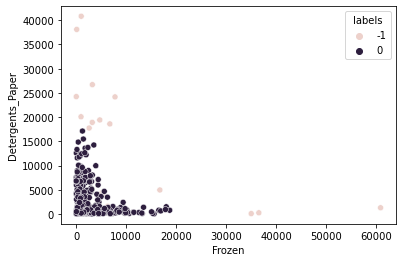

In [14]:
sns.scatterplot(df.Frozen, df.Detergents_Paper, hue=df.labels)
plt.show()

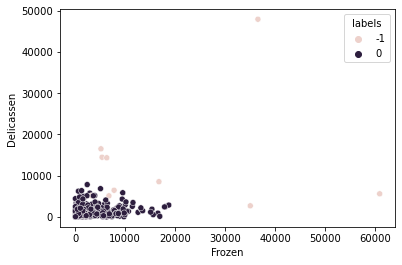

In [15]:
sns.scatterplot(df.Frozen, df.Delicassen, hue=df.labels)
plt.show()

Text(0.5, 0, 'Deli')

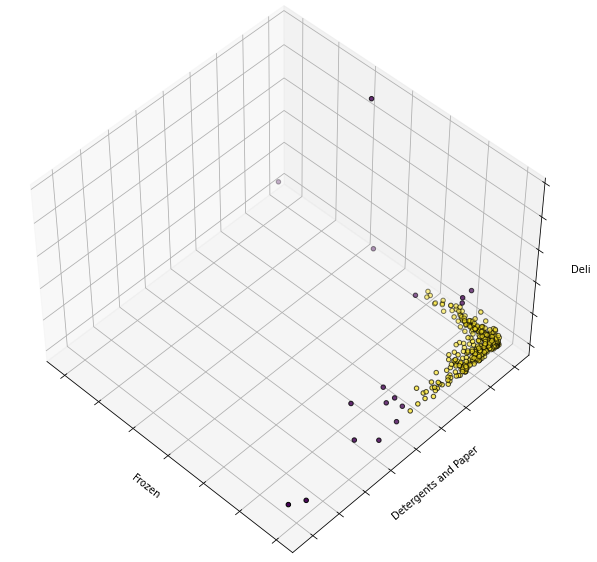

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Frozen, df.Detergents_Paper, df.Delicassen,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Frozen')
ax.set_ylabel('Detergents and Paper')
ax.set_zlabel('Deli')

---

#### Curriculum access logs = curriculum_logs_db

In [28]:
query = 'SELECT * FROM logs'
df = pd.read_sql(query, get_db_url('curriculum_logs'))
df.head()

,date,time,path,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [29]:
id_df = df.groupby('user_id')['date','cohort_id','path'].nunique()
id_df.head()

,date,cohort_id,path
user_id,,,
1,637,2,976
2,83,1,151
3,107,1,169
4,54,1,143
5,82,1,197


In [30]:
scaler = MinMaxScaler()
scaler.fit(id_df)
scaled_id_df = scaler.transform(id_df)
scaled_id_df

array([[0.76811594, 0.66666667, 1.        ],
       [0.09903382, 0.33333333, 0.15384615],
       [0.12801932, 0.33333333, 0.17230769],
       ...,
       [0.00966184, 0.33333333, 0.01948718],
       [0.00241546, 0.33333333, 0.        ],
       [0.00241546, 0.33333333, 0.00820513]])

In [31]:
dbsc = DBSCAN(eps = .10, min_samples = 20)
dbsc.fit(scaled_id_df)


DBSCAN(eps=0.1, min_samples=20)

In [32]:
scaled_columns = ['scaled_' + col for col in id_df.columns]
scaled_df = pd.DataFrame(scaled_id_df, columns = scaled_columns, index=id_df.index)
scaled_df.shape

(981, 3)

In [33]:
id_df.shape

(981, 3)

In [34]:
id_df = id_df.merge(scaled_df, left_index=True, right_index=True)
id_df.shape

(981, 6)

In [35]:
id_df.head()

,date,cohort_id,path,scaled_date,scaled_cohort_id,scaled_path
user_id,,,,,,
1,637,2,976,0.768116,0.666667,1.000000
2,83,1,151,0.099034,0.333333,0.153846
3,107,1,169,0.128019,0.333333,0.172308
4,54,1,143,0.064010,0.333333,0.145641
5,82,1,197,0.097826,0.333333,0.201026


In [36]:
labels = dbsc.labels_
labels.size

981

In [37]:
id_df['labels'] = labels

In [38]:
id_df.head()

,date,cohort_id,path,scaled_date,scaled_cohort_id,scaled_path,labels
user_id,,,,,,,
1,637,2,976,0.768116,0.666667,1.000000,-1
2,83,1,151,0.099034,0.333333,0.153846,0
3,107,1,169,0.128019,0.333333,0.172308,0
4,54,1,143,0.064010,0.333333,0.145641,0
5,82,1,197,0.097826,0.333333,0.201026,0


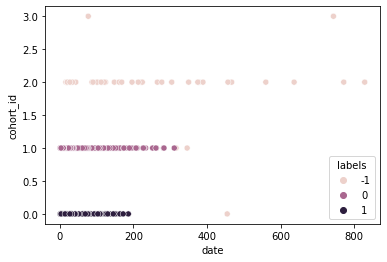

In [39]:
sns.scatterplot(id_df.date, id_df.cohort_id, hue=id_df.labels)
plt.show()

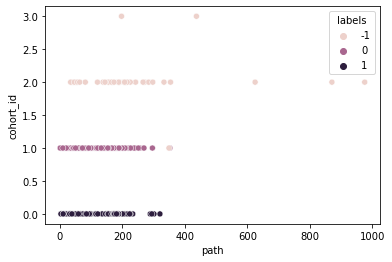

In [40]:
sns.scatterplot(id_df.path, id_df.cohort_id, hue=id_df.labels)
plt.show()

Text(0.5, 0, 'path')

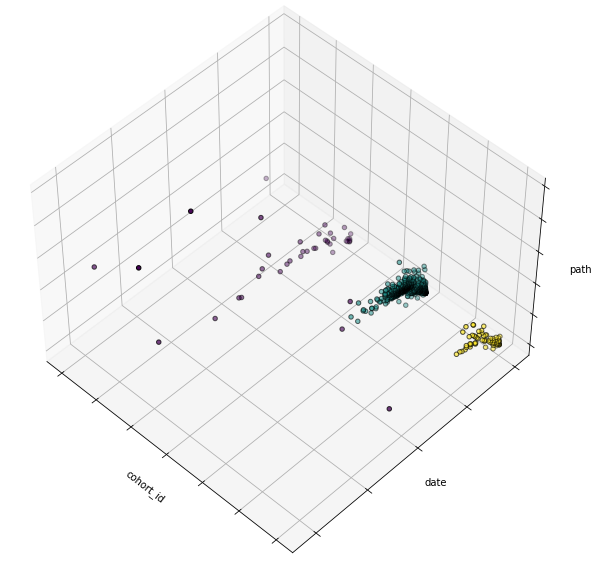

In [41]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(id_df.cohort_id, id_df.date, id_df.path,
           c=id_df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('cohort_id')
ax.set_ylabel('date')
ax.set_zlabel('path')

---

#### Zillow Dataset

In [2]:
def acquire_zillow():
    '''
    This function checks for a copy of the dataset in the local directory 
    and pulls a new copy and saves it if there is not one,
    it then cleans the data by removing significant outliers then
    removing the rows with null values for 'yearbuilt'
    '''
    #assign the file name
    filename = 'zillow_clustering.csv'
    #check if the file exists in the current directory and read it if it is
    if os.path.exists(filename):
        print('Reading from csv file...')
        #read the local .csv into the notebook
        df = pd.read_csv(filename)
        return df
    #assign the sql query to a variable for use in pulling a new copy of the dataset from the database
    query = '''
    SELECT 
    prop_2017.*,
    log.logerror,
    log.transactiondate,
    airconditioningtype.airconditioningdesc,
    architecturalstyletype.architecturalstyledesc,
    buildingclasstype.buildingclassdesc,
    heatingorsystemtype.heatingorsystemdesc,
    propertylandusetype.propertylandusedesc,
    storytype.storydesc,
    typeconstructiontype.typeconstructiondesc
    FROM properties_2017 AS prop_2017
    JOIN (SELECT parcelid, MAX(transactiondate) AS max FROM predictions_2017 GROUP BY parcelid) AS pred_2017 USING(parcelid)
    LEFT JOIN (SELECT * FROM predictions_2017) AS log ON log.parcelid = pred_2017.parcelid AND log.transactiondate = pred_2017.max
    LEFT JOIN airconditioningtype USING(airconditioningtypeid) 
    LEFT JOIN architecturalstyletype USING(architecturalstyletypeid) 
    LEFT JOIN buildingclasstype USING(buildingclasstypeid) 
    LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid) 
    LEFT JOIN propertylandusetype USING(propertylandusetypeid) 
    LEFT JOIN storytype USING(storytypeid)
    LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
    WHERE prop_2017.latitude IS NOT NULL;
    '''
    #if needed pull a fresh copy of the dataset from the database
    print('Getting a fresh copy from SQL database...')
    df = pd.read_sql(query, get_db_url('zillow'))
    #save a copy of the dataset to the local directory as a .csv file
    df.to_csv(filename, index=False)
    return df

In [3]:
df = acquire_zillow()
df.head()

Reading from csv file...


,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [4]:
df.columns

Index(['id', 'parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardb

In [5]:
df = df[['id', 'bedroomcnt', 'calculatedfinishedsquarefeet']]
df.head()

,id,bedroomcnt,calculatedfinishedsquarefeet
0,1727539,4.0,3100.0
1,1387261,2.0,1465.0
2,11677,3.0,1243.0
3,2288172,4.0,2376.0
4,1970746,3.0,1312.0


In [6]:
df.shape

(77381, 3)

In [7]:
df = df.set_index('id')
df.head()

,bedroomcnt,calculatedfinishedsquarefeet
id,,
1727539,4.0,3100.0
1387261,2.0,1465.0
11677,3.0,1243.0
2288172,4.0,2376.0
1970746,3.0,1312.0


In [8]:
df = df.dropna()
df.shape

(77185, 2)

In [9]:
scaler = MinMaxScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
scaled_df

array([[0.25      , 0.08369002],
       [0.125     , 0.03764925],
       [0.1875    , 0.03139784],
       ...,
       [0.25      , 0.07304573],
       [0.125     , 0.03525569],
       [0.25      , 0.0593039 ]])

In [10]:
dbsc = DBSCAN(eps = .10, min_samples = 20)
dbsc.fit(scaled_df)


DBSCAN(eps=0.1, min_samples=20)

In [11]:
scaled_columns = ['scaled_' + col for col in df.columns]
scaled_df = pd.DataFrame(scaled_df, columns = scaled_columns, index=df.index)
scaled_df.shape

(77185, 2)

In [12]:
df.shape

(77185, 2)

In [13]:
df = df.merge(scaled_df, left_index=True, right_index=True)
df.shape

(77185, 4)

In [14]:
df.head()

,bedroomcnt,calculatedfinishedsquarefeet,scaled_bedroomcnt,scaled_calculatedfinishedsquarefeet
id,,,,
1727539,4.0,3100.0,0.2500,0.083690
1387261,2.0,1465.0,0.1250,0.037649
11677,3.0,1243.0,0.1875,0.031398
2288172,4.0,2376.0,0.2500,0.063303
1970746,3.0,1312.0,0.1875,0.033341


In [15]:
labels = dbsc.labels_
labels.size

77185

In [16]:
df['labels'] = labels
df.head()

,bedroomcnt,calculatedfinishedsquarefeet,scaled_bedroomcnt,scaled_calculatedfinishedsquarefeet,labels
id,,,,,
1727539,4.0,3100.0,0.2500,0.083690,0
1387261,2.0,1465.0,0.1250,0.037649,0
11677,3.0,1243.0,0.1875,0.031398,0
2288172,4.0,2376.0,0.2500,0.063303,0
1970746,3.0,1312.0,0.1875,0.033341,0


In [17]:
df.labels.value_counts()

 0    77177
-1        8
Name: labels, dtype: int64

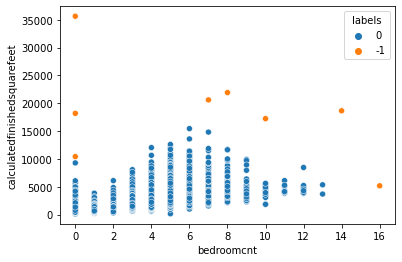

In [20]:
sns.scatterplot(df.bedroomcnt, df.calculatedfinishedsquarefeet, hue=df.labels)
plt.show()

In [19]:
#change the cluster label values to string values so seaborn uses categorical colors instead of a color gradient
df.labels = df.labels.astype(str)